1. Setup and Get Data

1.1 Install Dependencies and Setup

In [3]:
!pip install tensorflow opencv-python matplotlib albumentations

2. Review Dataset and Build Image Loading Function

2.1 Import TF and Deps

In [4]:
import tensorflow as tf
import cv2
import json
import numpy as np
from matplotlib import pyplot as plt

2025-03-06 11:30:00.515962: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-03-06 11:30:00.517931: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2025-03-06 11:30:00.548205: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2025-03-06 11:30:00.548794: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-03-06 11:30:01.184027: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Co

2.2 Load Image into TF Data Pipeline

In [5]:
images = tf.data.Dataset.list_files('data/frame_images_DB/*/*/*.jpg', shuffle=False)

In [6]:
images.as_numpy_iterator().next()

b'data/frame_images_DB/AJ_Cook/0/0.123.jpg'

In [7]:
def load_image(x):
    byte_img = tf.io.read_file(x)
    img = tf.io.decode_jpeg(byte_img)
    return img

In [8]:
images = images.map(load_image)

In [9]:
images.as_numpy_iterator().next()

array([[[ 63,  42,  37],
        [ 36,  17,  11],
        [ 24,   9,   4],
        ...,
        [  0,   7,   0],
        [  1,   8,   1],
        [  3,  10,   3]],

       [[ 87,  66,  61],
        [ 55,  36,  30],
        [ 29,  14,   9],
        ...,
        [  0,   7,   0],
        [  1,   8,   1],
        [  3,  10,   3]],

       [[124, 100,  96],
        [ 94,  73,  68],
        [ 56,  38,  34],
        ...,
        [  1,   6,   0],
        [  2,   7,   1],
        [  4,   9,   3]],

       ...,

       [[  0,   1,   0],
        [  0,   1,   0],
        [  0,   1,   0],
        ...,
        [  0,   1,   0],
        [  0,   1,   0],
        [  0,   1,   0]],

       [[  0,   1,   0],
        [  0,   1,   0],
        [  0,   1,   0],
        ...,
        [  0,   1,   0],
        [  0,   1,   0],
        [  0,   1,   0]],

       [[  0,   1,   0],
        [  0,   1,   0],
        [  0,   1,   0],
        ...,
        [  0,   1,   0],
        [  0,   1,   0],
        [  0,   1,   0]]

In [10]:
type(images)

tensorflow.python.data.ops.map_op._MapDataset

2.3 View Raw Images wit Matplotlib

In [11]:
image_generator = images.batch(4).as_numpy_iterator()

In [12]:
plot_images = image_generator.next()

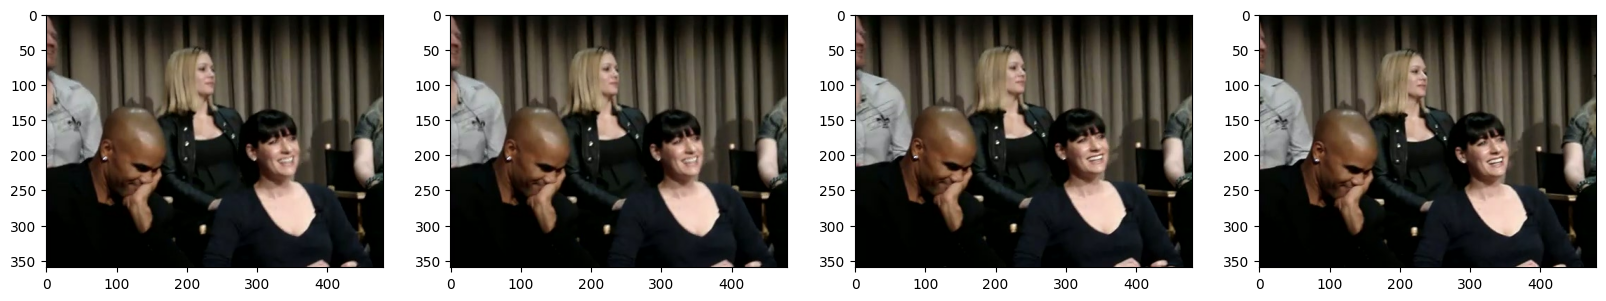

In [13]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, image in enumerate(plot_images):
    ax[idx].imshow(image)
plt.show()

3. Partition Unaugmented Data

3.1 Manually Split Data into Train, Test, and Val (I used arbitrary folders of videos of people)

In [14]:
90*0.7 # 63 to train

62.99999999999999

In [15]:
90*0.15 # 14 and 13 to test and val

13.5

3.2 Move the Matching labels (did that along with data already)

4. Apply Image Augmentations on Images and Labels using Albumentations (not augmenting our images...)

5. Load Augmented Images to Tensorflow Dataset (just use regular images)

5.1 Load Images to Tensorflow Dataset

In [16]:
train_images = tf.data.Dataset.list_files('data/train/*/*/*.jpg', shuffle=False)
train_images = train_images.map(load_image)
train_images = train_images.map(lambda x: tf.image.resize(x, (120,120)))
train_images = train_images.map(lambda x: x/255)

In [17]:
test_images = tf.data.Dataset.list_files('data/test/*/*/*.jpg', shuffle=False)
test_images = test_images.map(load_image)
test_images = test_images.map(lambda x: tf.image.resize(x, (120,120)))
test_images = test_images.map(lambda x: x/255)

In [18]:
val_images = tf.data.Dataset.list_files('data/val/*/*/*.jpg', shuffle=False)
val_images = val_images.map(load_image)
val_images = val_images.map(lambda x: tf.image.resize(x, (120,120)))
val_images = val_images.map(lambda x: x/255)

In [19]:
train_images.as_numpy_iterator().next()

array([[[0.        , 0.        , 0.22745098],
        [0.        , 0.        , 0.22352941],
        [0.        , 0.        , 0.20392157],
        ...,
        [0.04313726, 0.02745098, 0.02352941],
        [0.03529412, 0.01960784, 0.01568628],
        [0.02745098, 0.01176471, 0.00784314]],

       [[0.        , 0.        , 0.19215687],
        [0.        , 0.        , 0.18431373],
        [0.        , 0.        , 0.1882353 ],
        ...,
        [0.04705882, 0.03137255, 0.02745098],
        [0.04117647, 0.0254902 , 0.02156863],
        [0.03333334, 0.01764706, 0.01372549]],

       [[0.        , 0.        , 0.15686275],
        [0.        , 0.        , 0.14901961],
        [0.        , 0.        , 0.17254902],
        ...,
        [0.01764706, 0.00196078, 0.        ],
        [0.01568628, 0.        , 0.        ],
        [0.01176471, 0.        , 0.        ]],

       ...,

       [[0.22352941, 0.23137255, 0.20588236],
        [0.22745098, 0.23921569, 0.21176471],
        [0.2254902 , 0

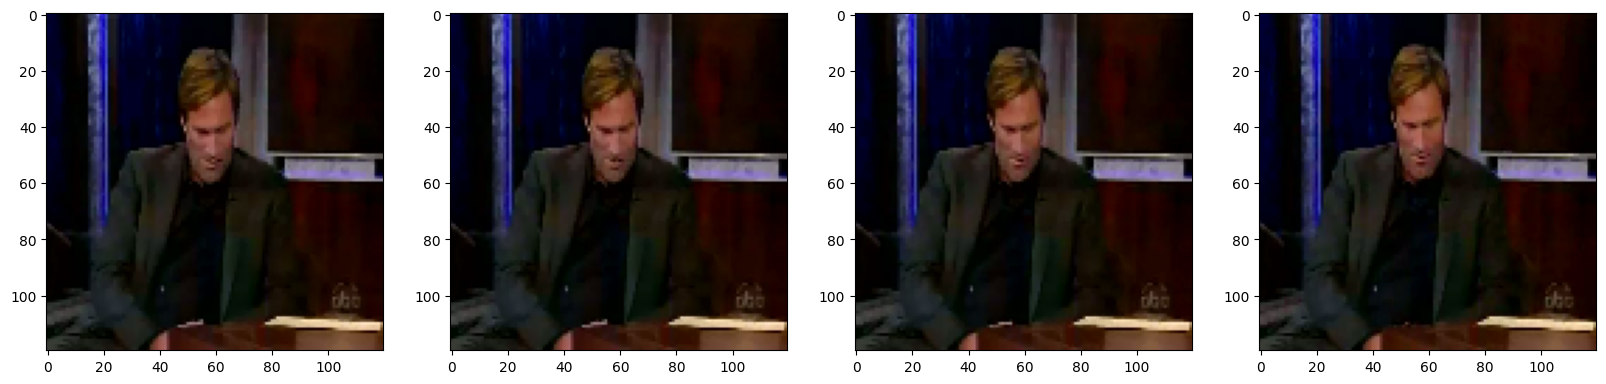

In [20]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, image in enumerate(train_images.batch(4).as_numpy_iterator().next()):
    ax[idx].imshow(image)
plt.show()

6. Prepare Labels

6.1 Build Label Loading Function

In [150]:
def load_labels(label_path):
    bbox = []
    file_content = tf.io.read_file(label_path)
    tokens = tf.strings.split(file_content, sep=",")

    # Collect relavent bbox data (center, width, and height)
    center_point = (tf.strings.to_number(tokens[2], out_type=tf.float32), 
                    tf.strings.to_number(tokens[3], out_type=tf.float32))
    width = tf.strings.to_number(tokens[4], out_type=tf.float32)
    height = tf.strings.to_number(tokens[5], out_type=tf.float32)

    # Calculate normalized corner points of bbox
    corners = [center_point[0] - 0.5 * width, center_point[1] + 0.5 * height, # top-left corner
               center_point[0] + 0.5 * width, center_point[1] - 0.5 * height] # bottom-right corner
    
    return (0, corners)

In [151]:
print(load_labels("data/train/labels/Aaron_EckhartQsZ0QsZ0.555.txt"))

(0, [<tf.Tensor: shape=(), dtype=float32, numpy=0.40625>, <tf.Tensor: shape=(), dtype=float32, numpy=0.49722224>, <tf.Tensor: shape=(), dtype=float32, numpy=0.58125>, <tf.Tensor: shape=(), dtype=float32, numpy=0.2638889>])


6.2 Load Labels to Tensorflow Dataset

In [152]:
train_labels = tf.data.Dataset.list_files('data/train/labels/*.txt', shuffle=False)
train_labels = train_labels.map(load_labels)

In [153]:
test_labels = tf.data.Dataset.list_files('data/test/labels/*.txt', shuffle=False)
test_labels = test_labels.map(load_labels)

In [154]:
val_labels = tf.data.Dataset.list_files('data/val/labels/*.txt', shuffle=False)
val_labels = val_labels.map(load_labels)

In [155]:
train_labels.as_numpy_iterator().next()

(0, array([0.40625   , 0.49722224, 0.58125   , 0.2638889 ], dtype=float32))

7. Combine Label and Image Samples

7.1 Check Partition Lengths

In [156]:
len(train_images), len(train_labels), len(test_images), len(test_labels), len(val_images), len(val_labels)

(1054, 1054, 166, 166, 174, 174)

7.2 Create Final Datasets (Images/Labels)

In [157]:
train = tf.data.Dataset.zip((train_images,train_labels))
train = train.shuffle(2000)
train = train.batch(8)
train = train.prefetch(4)

In [158]:
test = tf.data.Dataset.zip((test_images,test_labels))
test = test.shuffle(300)
test = test.batch(8)
test = test.prefetch(4)

In [159]:
val = tf.data.Dataset.zip((val_images,val_labels))
val = val.shuffle(300)
val = val.batch(8)
val = val.prefetch(4)

In [160]:
train.as_numpy_iterator().next()[1][1]

array([[0.34646738, 0.6129808 , 0.5720109 , 0.2139423 ],
       [0.4109375 , 0.41458333, 0.5703125 , 0.20208333],
       [0.4359375 , 0.43958333, 0.5890625 , 0.23541668],
       [0.3614583 , 0.62916666, 0.671875  , 0.21527778],
       [0.24687502, 0.6666666 , 0.634375  , 0.15      ],
       [0.41354167, 0.6319444 , 0.71979165, 0.2236111 ],
       [0.25      , 0.65      , 0.63125   , 0.14166668],
       [0.6078125 , 0.39375   , 0.7984375 , 0.13958335]], dtype=float32)

7.3 View Images and Annotations

In [161]:
data_samples = train.as_numpy_iterator()

In [162]:
res = data_samples.next()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


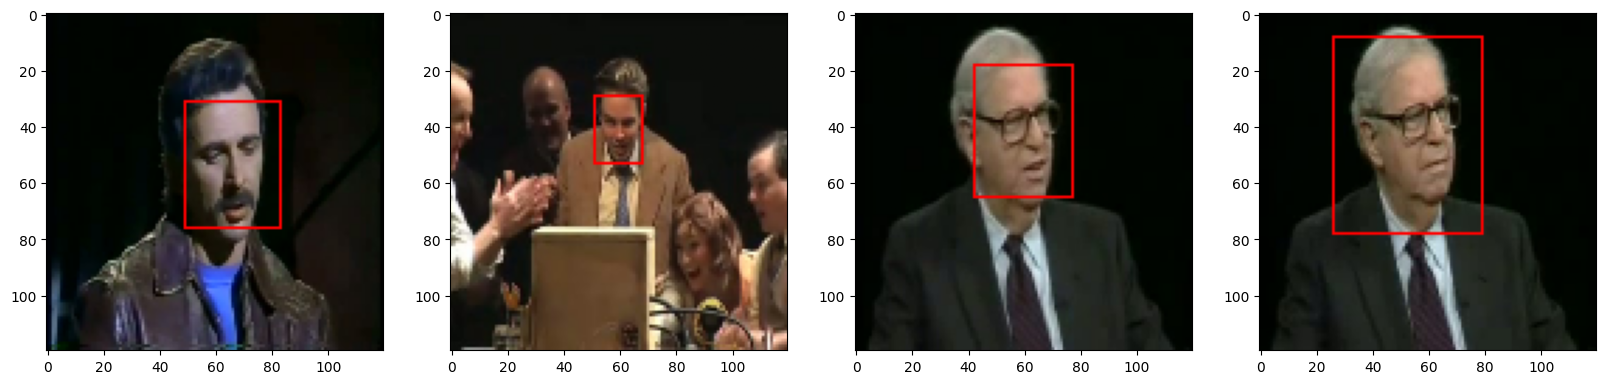

In [164]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx in range(4):
    sample_image = res[0][idx].copy()
    
    # Note: The batch() function has formatted the corner points weirdly.
    # i indexs into the x/y coordinate of the top-left/bottom-right corner.
    #     i = 0 -> x coordinate of the top-left corner
    #     i = 1 -> y coordinate of the top-left corner
    #     i = 2 -> x coordinate of the bottom-right corner
    #     i = 3 -> y coordinate of the bottom-right corner
    # idx indexes into a particular item in a batch.
    #     in this case, there are 8 items per batch
    sample_coords = res[1][1][idx]
    
    cv2.rectangle(sample_image,
                  tuple(np.multiply(sample_coords[:2], [120,120]).astype(int)),
                  tuple(np.multiply(sample_coords[2:], [120,120]).astype(int)),
                  (255,0,0), 1)

    ax[idx].imshow(sample_image)

8. Build Deep Learning using the Functional API

8.1 Import Layers and Base Network

In [165]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, Dense, GlobalMaxPooling2D
from tensorflow.keras.applications import VGG16

8.2 Download VGG16

In [166]:
vgg = VGG16(include_top=False)

In [167]:
vgg.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, None, None, 3)]   0         
                                                                 
 block1_conv1 (Conv2D)       (None, None, None, 64)    1792      
                                                                 
 block1_conv2 (Conv2D)       (None, None, None, 64)    36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, None, None, 64)    0         
                                                                 
 block2_conv1 (Conv2D)       (None, None, None, 128)   73856     
                                                                 
 block2_conv2 (Conv2D)       (None, None, None, 128)   147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, None, None, 128)   0     

8.3 Build Instance of Network

In [168]:
def build_model():
    input_layer = Input(shape=(120,120,3))

    vgg = VGG16(include_top=False)(input_layer)

    # Classification Model
    f1 = GlobalMaxPooling2D()(vgg)
    class1 = Dense(2048, activation='relu')(f1)
    class2 = Dense(1, activation='sigmoid')(class1)

    # Bounding Box Model
    f2 = GlobalMaxPooling2D()(vgg)
    regress1 = Dense(2048, activation='relu')(f2)
    regress2 = Dense(4, activation='sigmoid')(regress1)

    facetracker = Model(inputs=input_layer, outputs=[class2, regress2])
    return facetracker

8.4 Test our Neural Network

In [169]:
facetracker = build_model()

In [170]:
facetracker.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_5 (InputLayer)        [(None, 120, 120, 3)]        0         []                            
                                                                                                  
 vgg16 (Functional)          (None, None, None, 512)      1471468   ['input_5[0][0]']             
                                                          8                                       
                                                                                                  
 global_max_pooling2d_2 (Gl  (None, 512)                  0         ['vgg16[0][0]']               
 obalMaxPooling2D)                                                                                
                                                                                            

In [171]:
X, y = train.as_numpy_iterator().next()

In [172]:
X.shape

(8, 120, 120, 3)

In [173]:
classes, coords = facetracker.predict(X)

1/1 [==============================] - 0s 247ms/step


In [174]:
classes, coords

(array([[0.6451381 ],
        [0.7326127 ],
        [0.7415723 ],
        [0.6809845 ],
        [0.60429865],
        [0.6870909 ],
        [0.6910972 ],
        [0.6586742 ]], dtype=float32),
 array([[0.7799769 , 0.6491355 , 0.6728351 , 0.3361199 ],
        [0.70676225, 0.4672612 , 0.6354518 , 0.30320144],
        [0.7121512 , 0.4530524 , 0.61956924, 0.28501996],
        [0.6354826 , 0.56625867, 0.66263694, 0.4024382 ],
        [0.74692196, 0.55104804, 0.64697635, 0.42134967],
        [0.71642566, 0.52817   , 0.6317458 , 0.35889658],
        [0.72019994, 0.6078316 , 0.64996576, 0.43125185],
        [0.6235456 , 0.5371909 , 0.65195227, 0.36439574]], dtype=float32))

9. Define Losses and Optimizers

9.1 Define Optimizer and LR

In [175]:
batches_per_epoch = len(train)
lr_decay = (1./0.75 - 1) / batches_per_epoch
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    0.0001,
    batches_per_epoch,
    1 - lr_decay,
    staircase=False)

In [176]:
opt = tf.keras.optimizers.Adam(learning_rate=lr_schedule)

In [177]:
def localization_loss(y_true, yhat):
    # y_true = a batch of bounding box coords
    # yhat = a batch of predicted bounding box coords
    delta_coord = tf.reduce_sum(tf.square(y_true[:,:2] - yhat[:,:2]))

    h_true = y_true[:,3] - y_true[:,1]
    w_true = y_true[:,2] - y_true[:,0]

    h_pred = yhat[:,3] - yhat[:,1]
    w_pred = yhat[:,2] - yhat[:,0]

    delta_size = tf.reduce_sum(tf.square(w_true-w_pred) + tf.square(h_true-h_pred))

    return delta_coord + delta_size

In [178]:
classloss = tf.keras.losses.BinaryCrossentropy()
regressloss = localization_loss

9.3 Test out Loss Metrics

In [182]:
localization_loss(y[1], coords).numpy()

2.6299534

In [183]:
classloss(y[0], classes).numpy()

1.1486651

In [184]:
regressloss(y[1], coords).numpy()

2.6299534

10. Train Neural Network

10.1 Create Custom Model Class

In [200]:
class FaceTracker(Model):
    def __init__(self, facetracker, **kwargs):
        super().__init__(**kwargs)
        self.model = facetracker

    def compile(self, opt, classloss, localizationloss, **kwargs):
        super().compile(**kwargs)
        self.closs = classloss
        self.lloss = localizationloss
        self.opt = opt

    def train_step(self, batch, **kwargs):

        X, y = batch

        with tf.GradientTape() as tape:
            classes, coords = self.model(X, training=True)

            batch_classloss = self.closs(y[0], classes)
            batch_localizationloss = self.lloss(tf.cast(y[1], tf.float32), coords)

            total_loss = batch_localizationloss+0.5*batch_classloss

            grad = tape.gradient(total_loss, self.model.trainable_variables)

        opt.apply_gradients(zip(grad, self.model.trainable_variables))

        return {"total_loss":total_loss, "class_loss":batch_classloss, "regress_loss":batch_localizationloss}

    def test_step(self, batch, **kwargs):
        X, y = batch

        classes, coords = self.model(X, training=False)

        batch_classloss = self.closs(y[0], classes)
        batch_localizationloss = self.lloss(tf.cast(y[1], tf.float32), coords)
        total_loss = batch_localizationloss+0.5*batch_classloss

        return {"total_loss":total_loss, "class_loss":batch_classloss, "regress_loss":batch_localizationloss}

    def call(self, X, **kwargs):
        return self.model(X, **kwargs)

In [201]:
model = FaceTracker(facetracker)

In [202]:
model.compile(opt, classloss, regressloss)

10.2 Train

In [203]:
logdir='logs'

In [204]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [205]:
hist = model.fit(train, epochs=40, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/40
132/132 [==============================] - 108s 814ms/step - total_loss: 0.0187 - class_loss: 1.9654e-04 - regress_loss: 0.0186 - val_total_loss: 0.1925 - val_class_loss: 6.0321e-04 - val_regress_loss: 0.1922
Epoch 2/40
132/132 [==============================] - 115s 870ms/step - total_loss: 0.0168 - class_loss: 1.3267e-04 - regress_loss: 0.0167 - val_total_loss: 0.0872 - val_class_loss: 1.9043e-04 - val_regress_loss: 0.0871
Epoch 3/40
132/132 [==============================] - 116s 880ms/step - total_loss: 0.0170 - class_loss: 7.1344e-05 - regress_loss: 0.0170 - val_total_loss: 0.1712 - val_class_loss: 7.1752e-05 - val_regress_loss: 0.1712
Epoch 4/40
132/132 [==============================] - 118s 890ms/step - total_loss: 0.0172 - class_loss: 6.0377e-05 - regress_loss: 0.0172 - val_total_loss: 0.2034 - val_class_loss: 7.0198e-05 - val_regress_loss: 0.2034
Epoch 5/40
132/132 [==============================] - 118s 892ms/step - total_loss: 0.0100 - class_loss: 3.5496e-05 - re

10.3 Plot Performance

In [206]:
hist.history

{'total_loss': [0.02464875765144825,
  0.008795777335762978,
  0.0033647678792476654,
  0.006344418507069349,
  0.003008566563948989,
  0.008390028029680252,
  0.0038805161602795124,
  0.005254081450402737,
  0.0016493822913616896,
  0.002522441791370511,
  0.003972801845520735,
  0.001305960351601243,
  0.00215916708111763,
  0.0013926407555118203,
  0.004117745906114578,
  0.004415478091686964,
  0.009998234920203686,
  0.011875626631081104,
  0.0027688131667673588,
  0.024996839463710785,
  0.004233199637383223,
  0.007507956586778164,
  0.004747283179312944,
  0.010961067862808704,
  0.006382716819643974,
  0.0026142089627683163,
  0.009278078563511372,
  0.002730083651840687,
  0.009672710672020912,
  0.015010128729045391,
  0.0026483372785151005,
  0.0010916623286902905,
  0.0013712546788156033,
  0.013632835820317268,
  0.004775480832904577,
  0.0017832780722528696,
  0.001321130315773189,
  0.013738702051341534,
  0.003136423649266362,
  0.018581101670861244],
 'class_loss': [5

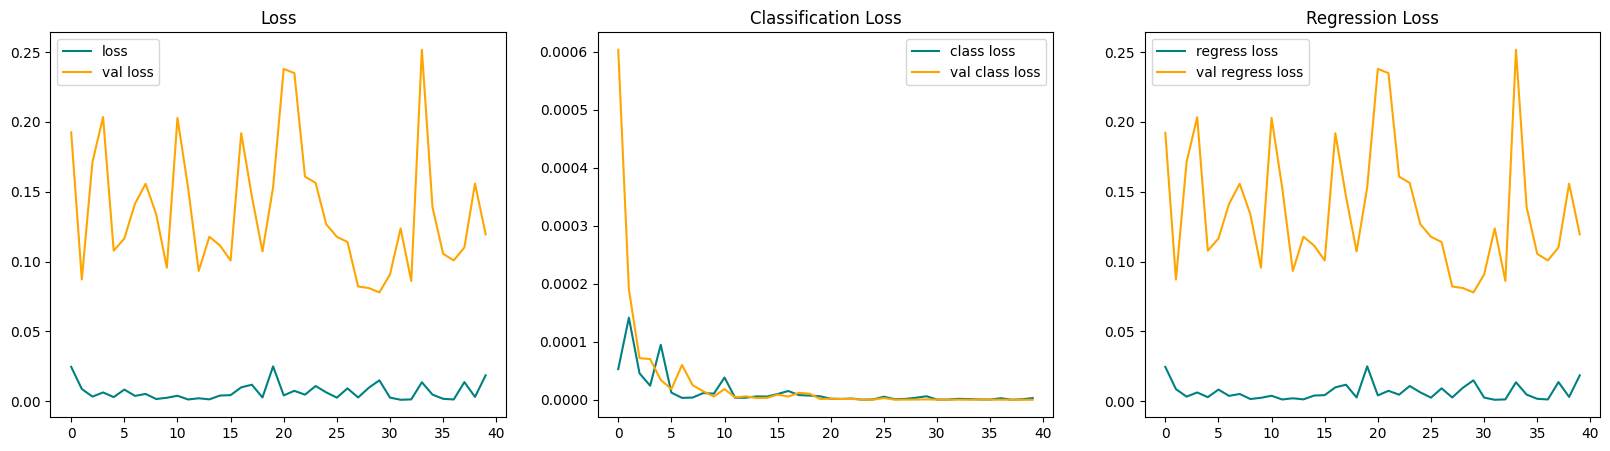

In [208]:
fig, ax = plt.subplots(ncols=3, figsize=(20,5))

ax[0].plot(hist.history['total_loss'], color='teal', label='loss')
ax[0].plot(hist.history['val_total_loss'], color='orange', label='val loss')
ax[0].title.set_text('Loss')
ax[0].legend()

ax[1].plot(hist.history['class_loss'], color='teal', label='class loss')
ax[1].plot(hist.history['val_class_loss'], color='orange', label='val class loss')
ax[1].title.set_text('Classification Loss')
ax[1].legend()

ax[2].plot(hist.history['regress_loss'], color='teal', label='regress loss')
ax[2].plot(hist.history['val_regress_loss'], color='orange', label='val regress loss')
ax[2].title.set_text('Regression Loss')
ax[2].legend()

plt.show()

11. Make Predictions

11.1 Make Predictions on Test Set

In [209]:
test_data = test.as_numpy_iterator()

In [210]:
test_sample = test_data.next()

In [211]:
yhat = facetracker.predict(test_sample[0])

1/1 [==============================] - 0s 182ms/step


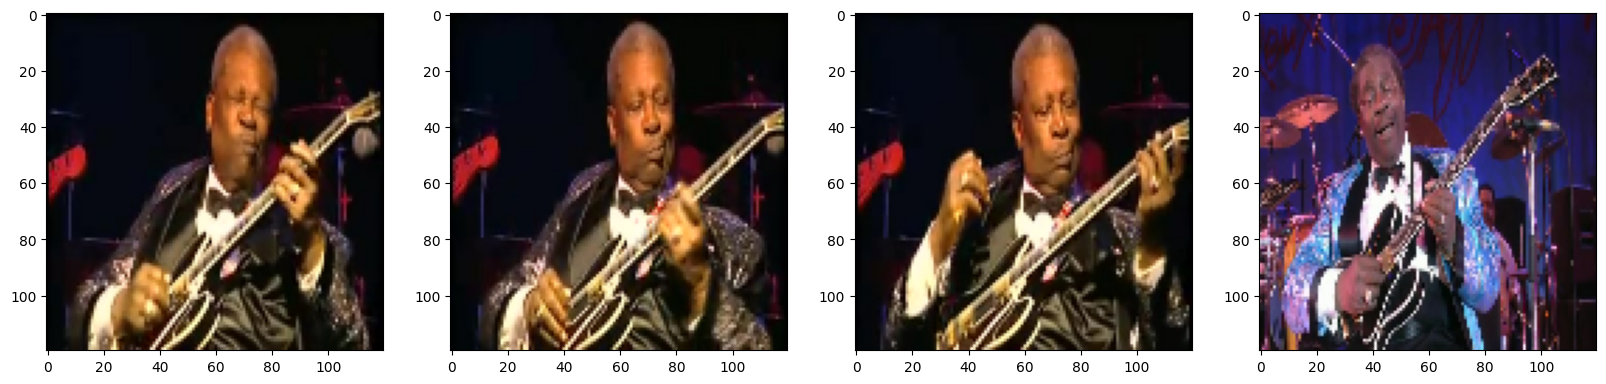

In [212]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx in range(4):
    sample_image = test_sample[0][idx].copy()
    sample_coords = yhat[1][idx]

    if yhat[0][idx] > 0.9:
        cv2.rectangle(sample_image,
                      tuple(np.multiply(sample_coords[:2], [120,120]).astype(int)),
                      tuple(np.multiply(sample_coords[2:], [120,120]).astype(int)),
                      (255,0,0), 1)
    ax[idx].imshow(sample_image)

11.2 Save the Model

In [213]:
from tensorflow.keras.models import load_model

In [215]:
facetracker.save('facetracker.keras')

In [216]:
facetracker = load_model('facetracker.keras')